<a id='home'></a>
### purpose 

create PCA figs across varieties using no missing data

### outline

1. [get SNPs](#snps)
1. [get population color assignments](#colors)
1. [do PCA](#pca)


In [1]:
from pythonimports import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
import seaborn as sns

lview,dview = get_client()

56 56


In [2]:
latest_commit()
sinfo(html=True)

##################################################################
Current commit of pythonimports:
commit 3a4b7edd94791192e01088623ade64a0a79f4b39
Author: Brandon Lind <lindb@vcu.edu>
Date:   Tue Mar 23 14:07:40 2021 -0400
Today:	April 13, 2021 - 14:47:44
python version: 3.8.5
##################################################################



<a id='snps'></a>
# get loci

[top](#home)

In [4]:
def frequenize(df):
    """Filter for no missing data, convert % to float."""
    
    freqcols = [col for col in df.columns if 'FREQ' in col]
    df.index = df['locus'].tolist()

    # filter for no missing data
    nomissing = df[freqcols].apply(lambda x: x.isnull().sum() == 0, axis=1)  # rows with no missing data
    df = df.loc[nomissing]
    
    # convert to float
    df = df[freqcols].apply(lambda freq: freq.str.rstrip("%").astype(float)/100, axis=0)
    
    return df

In [5]:
# filter cand convert in parallel - note .T transpose at end of parallel_read
freqs = parallel_read('/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties\
/03_maf-p05_RD-recalculated_both/DF_pooled-varscan_all_bedfiles_SNP_both-varieties_maf_RD-recalculated.txt',
                      lview=lview, dview=dview, functions=create_fundict(frequenize), reset_index=False,
                      verbose=False, assert_rowcount=False).T
freqs.head()


Watching 56 parallel_read() jobs ...


DF_pooled-varscan_all_bedfiles_SNP_both-varieties_maf_RD-recalculated.txt: 100%|██████████| 56/56 [01:02<00:00,  1.12s/it]


Function `parallel_read` completed after : 0-00:01:17


,jcf7190000000004-54589,jcf7190000000004-54700,jcf7190000000004-55528,jcf7190000000004-55573,jcf7190000000004-55840,jcf7190000000004-57381,jcf7190000000004-470650,jcf7190000000004-471005,jcf7190000000004-471146,jcf7190000000004-471461,jcf7190000000004-480048,jcf7190000000004-480109,jcf7190000000004-480120,jcf7190000000004-480192,jcf7190000000004-480234,jcf7190000000004-480374,jcf7190000000004-480442,jcf7190000000004-480532,jcf7190000000004-480561,jcf7190000000004-480589,jcf7190000000004-480614,jcf7190000000004-480710,jcf7190000000004-480806,jcf7190000000004-480813,jcf7190000000004-480877,jcf7190000000004-480954,jcf7190000000004-481001,jcf7190000000004-481051,jcf7190000000004-481053,jcf7190000000004-481162,jcf7190000000004-481219,jcf7190000000004-481440,jcf7190000000004-637023,jcf7190000000008-157863,jcf7190000000008-157919,jcf7190000000008-158088,jcf7190000000008-430526,jcf7190000000008-430575,jcf7190000000008-431830,jcf7190000000011-187986,jcf7190000000011-190610,jcf7190000000011-191332,jcf7190000000014-15050,jcf7190000000022-343519,jcf7190000000022-343560,jcf7190000000023-5499,jcf7190000000023-5796,jcf7190000000023-6180,jcf7190000000023-30456,jcf7190000000023-32552,...,jcf7190000086531-66018,jcf7190000086531-66481,jcf7190000086531-66513,jcf7190000086531-66645,jcf7190000086531-66659,jcf7190000089401-57683,jcf7190000089401-57701,jcf7190000089401-57761,jcf7190000089401-57818,jcf7190000091950-37270,jcf7190000091952-64169,jcf7190000091952-334850,jcf7190000113769-169606,jcf7190000113769-169641,jcf7190000113769-169650,jcf7190000113769-169684,jcf7190000113769-174061,jcf7190000113769-174085,jcf7190000113769-174090,jcf7190000113769-174136,jcf7190000113769-174435,jcf7190000113769-174509,jcf7190000113769-174531,jcf7190000113769-174561,jcf7190000113769-174670,jcf7190000113769-174673,jcf7190000113769-174708,jcf7190000113769-174792,jcf7190000113769-174895,jcf7190000113769-175622,jcf7190000113769-175739,jcf7190000113769-175766,jcf7190000113769-175767,jcf7190000123086-22314,jcf7190000123643-40499,jcf7190000129186-216754,jcf7190000129186-217196,jcf7190000129350-17130,jcf7190000132182-15539,jcf7190000151756-68187,jcf7190000151756-75441,jcf7190000151756-75450,jcf7190000151756-75573,jcf7190000151756-75688,jcf7190000151756-75711,jcf7190000151756-75908,jcf7190000151756-75909,jcf7190000151756-76749,jcf7190000214670-1519,jcf7190000214670-1542
DF_p1.FREQ,0.8667,0.3205,0.3708,0.3100,0.2535,0.2727,0.8636,0.7143,0.7451,0.7500,0.7875,0.7935,0.8242,0.2041,0.8021,0.6750,0.7857,0.8072,0.8026,0.7361,0.7536,0.6716,0.7705,0.7857,0.6769,0.2222,0.7436,0.7922,0.7564,0.5802,0.5893,0.8333,0.2154,0.6552,0.7273,0.7895,0.8395,0.8120,0.8116,0.7059,0.2950,0.4095,0.0179,0.8500,0.7941,0.9130,0.9437,0.9400,0.9636,1.0000,...,0.8817,0.9429,0.9091,0.7170,0.5455,0.4118,0.4419,0.5200,0.4800,0.2195,0.7778,0.8033,0.7167,0.6818,0.7538,0.6567,0.7727,0.8000,0.8000,0.7879,0.7541,0.6207,0.7231,0.7500,0.7556,0.7778,0.7167,0.6842,0.6667,0.7073,0.5088,0.6452,0.7049,0.7080,0.9091,0.6870,0.7436,0.0000,0.5862,0.7237,0.4124,0.4694,0.4545,0.5000,0.4524,0.4848,0.4923,0.4754,0.7538,0.3846
DF_p18.FREQ,0.9808,0.8750,0.9014,0.9286,0.8696,0.8333,0.6364,0.8205,0.7419,0.8158,0.6512,0.5882,0.7128,0.4318,0.4359,0.2097,0.9855,0.4310,0.6471,0.7391,0.8163,0.8636,0.9744,0.7143,0.9667,0.3462,0.5000,0.8172,0.8526,0.5052,0.4603,0.8333,0.2308,0.6897,0.8056,1.0000,1.0000,1.0000,0.9787,0.4507,0.0748,0.1728,1.0000,0.7333,0.7097,0.9492,0.9216,1.0000,0.8800,0.9024,...,1.0000,0.9250,1.0000,0.8393,0.7551,0.4576,0.7368,0.5179,0.4906,0.9888,0.8000,1.0000,0.8246,0.8276,0.8909,0.8148,0.6939,0.7885,0.8000,0.8113,0.8235,0.6613,0.8302,0.8409,0.8140,0.8298,0.6984,0.8163,0.7800,0.9143,0.7679,0.7963,0.8148,0.9375,0.9706,0.9873,1.0000,0.8621,0.9091,0.9200,0.8333,0.9831,0.8000,0.9420,0.9390,0.9206,0.9206,0.9118,0.7872,0.3750
DF_p19.FREQ,1.0000,0.9672,0.9036,0.9277,0.9677,0.9592,0.9636,0.9524,0.9722,0.9524,0.8537,0.7615,0.8684,0.6600,0.6452,0.5325,1.0000,0.8421,0.9730,0.9688,0.9483,0.8983,0.9615,0.9600,0.9444,0.3592,0.3898,0.9394

In [6]:
nrow(freqs)

73

<a id='colors'></a>
# get pop colors

[top](#home)

In [7]:
colordf = pd.read_table('/data/projects/pool_seq/environemental_data/change_p6/doug-fir_colored_pops.txt')
colordf.index = colordf['our_id'].tolist()
colordf.head()

,prov,our_id,Variety,LONG,LAT,group,group_color
DF_p1,1,DF_p1,FDC,-126.63,49.78,Western BC,#a6cee3
DF_p2,2,DF_p2,FDC,-122.73,50.32,Lower Mainland,#33a02c
DF_p3,3,DF_p3,FDI,-115.62,50.54,Eastern BC,#22ff00
DF_p4,4,DF_p4,FDI,-122.33,52.04,North BC,#f205f4
DF_p5,5,DF_p5,FDI,-119.05,49.02,Tri-state,#995bbe


In [8]:
nrow(colordf)

73

In [9]:
Counter(colordf['Variety'])

Counter({'FDC': 38, 'FDI': 35})

In [10]:
coldict = dict(zip(colordf['group'], colordf['group_color']))
coldict.update({'Landrace': 'saddlebrown'})

<a id='pca'></a>
# Do PCA

[top](#home)

In [11]:
sns.set()

In [12]:
def get_pca_scores(data, n_components=None):
    """Run principal component analysis."""
    pca = PCA(n_components=n_components)
    pca.fit(data)
    scores_pca = pca.transform(data)
    scores_df = pd.DataFrame(scores_pca, index=data.index)
    return scores_pca, scores_df, pca

def create_segment(freqdata, scores_df):
    """Hacky way around avoiding the k-means part of previous PCA pipelines."""
    df = pd.merge(freqdata.loc[scores_df.index], scores_df, left_index=True, right_index=True)
    df.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
    df.index = [pop.rstrip(".FREQ") for pop in df.index]
    df['Segment K-means PCA'] = df.index.map(dict(colordf['group']))
    df['Segment'] = df.index.map(dict(colordf['group']))
    df['Segment'][df['Segment'].isnull()] = 'Landrace'
    df['Segment K-means PCA'][df['Segment K-means PCA'].isnull()] = 'saddlebrown'
    return df

def plot_2d_pca(segmentdata, pca_scores, pca, axes=[0,1], labels=False, saveloc=None, figsize=(12,12)):
    """Plot 2D PCA using `axes`.
    
    `axes` list of the two axes to plot the PCA. These are the colnames in pca_scores, assumed that
        axis = axes+1 (eg axes=[0,1] is PC1 and PC2)
    """
    plt.figure(figsize=figsize)
    for rows, name, label in zip(segmentdata.index,
                                 segmentdata['Segment'],
                                 segmentdata['Segment K-means PCA']):
        indices = segmentdata[segmentdata['Segment K-means PCA']==label].index.tolist() 
        xcoord = pca_scores[segmentdata['Segment K-means PCA']==label, axes[0]]
        ycoord = pca_scores[segmentdata['Segment K-means PCA']==label, axes[1]]
        plt.scatter(xcoord, ycoord, label=name, c=coldict[name], edgecolor='k', s=50)
        if labels is True:
            for row,x,y in zip(indices, xcoord, ycoord):
                if 'LR' in row:
                    plt.annotate(clabels[row][:2], (x, y), color="k")
    varexp_x, varexp_y = [round(pca.explained_variance_ratio_[i], 4)*100 for i in axes]
    plt.xlabel(f'PC{axes[0]+1} ({varexp_x}%)')
    plt.ylabel(f'PC{axes[1]+1} ({varexp_y}%)')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend([by_label[key] for key in ['first','second','third','fourth','fifth'] if key in segmentdata['Segment']],
               [x for x in ['first','second','third','fourth','fifth'] if x in segmentdata['Segment']])
    
    if saveloc is not None:
        with PdfPages(saveloc) as pdf:
            pdf.savefig(bbox_inches="tight")
        print(ColorText('Saved figure to: ').bold(), saveloc)

    plt.show()
    
    return by_label

In [13]:
# do pca
scores, scores_df, pca = get_pca_scores(freqs, n_components=3)

In [14]:
pcafreqs = create_segment(freqs, scores_df)
nrow(pcafreqs), nrow(freqs)

<ipython-input-12-8c2adb2e2e30>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'][df['Segment'].isnull()] = 'Landrace'
<ipython-input-12-8c2adb2e2e30>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment K-means PCA'][df['Segment K-means PCA'].isnull()] = 'saddlebrown'


(73, 73)

In [15]:
Counter(pcafreqs['Segment'])

Counter({'Western BC': 11,
         'Tri-state': 9,
         'Lower Mainland': 4,
         'Montana': 4,
         'Washington': 7,
         'Eastern BC': 6,
         'North BC': 11,
         'West Interior': 1,
         'South Central BC': 4,
         'California': 5,
         'Oregon': 11})

In [16]:
savedir = makedir('/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/figs')

Saved figure to:  /data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/figs/both_varieties.pdf


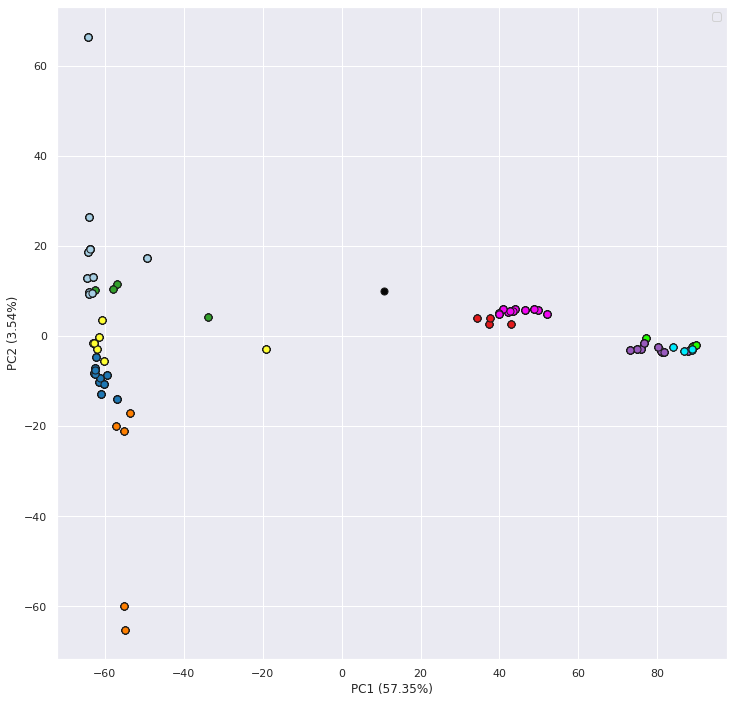

In [17]:
x = plot_2d_pca(pcafreqs, scores, pca, saveloc=op.join(savedir, 'both_varieties.pdf'))